In [31]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold

In [35]:
data = pd.read_csv("/content/ADANIPORTS.csv")

# Data Analysis

In [3]:
#first five records of the data
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741


In [20]:
data.shape

(2990, 15)

In [6]:
data.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [7]:
#should convert 'Date' from object to datetime
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2993 entries, 0 to 2992
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                2993 non-null   object 
 1   Symbol              2993 non-null   object 
 2   Series              2993 non-null   object 
 3   Prev Close          2993 non-null   float64
 4   Open                2993 non-null   float64
 5   High                2993 non-null   float64
 6   Low                 2993 non-null   float64
 7   Last                2993 non-null   float64
 8   Close               2993 non-null   float64
 9   VWAP                2993 non-null   float64
 10  Volume              2993 non-null   int64  
 11  Turnover            2993 non-null   float64
 12  Trades              2126 non-null   float64
 13  Deliverable Volume  2993 non-null   int64  
 14  %Deliverble         2993 non-null   float64
dtypes: float64(10), int64(2), object(3)
memory usage: 350.9

In [5]:
#we have 867 null value in traders
data.isnull().sum()

Date                    0
Symbol                  0
Series                  0
Prev Close              0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
VWAP                    0
Volume                  0
Turnover                0
Trades                867
Deliverable Volume      0
%Deliverble             0
dtype: int64

In [16]:
duplicates=data.duplicated().sum()
print("number of duplicates: ",duplicates)

number of duplicates:  3


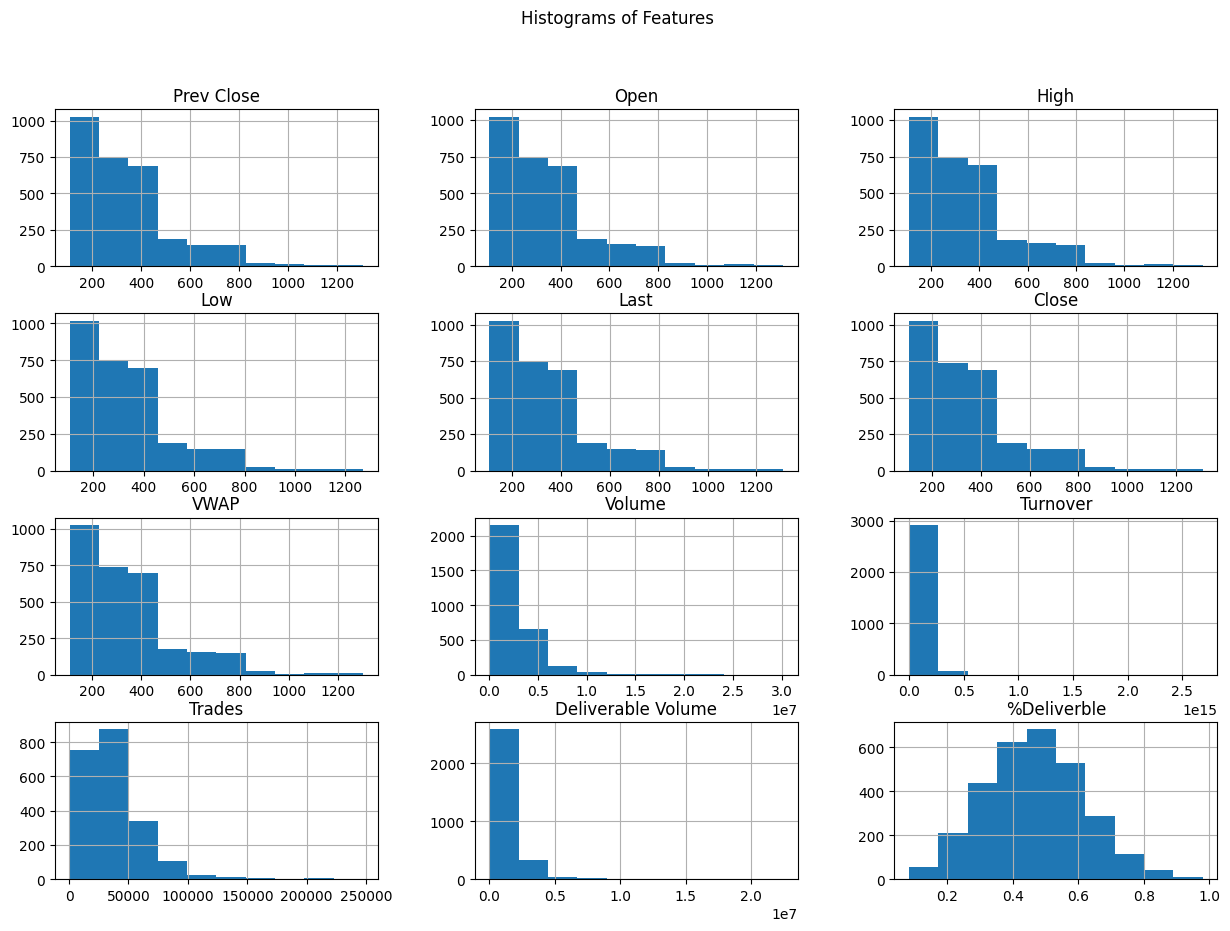

In [16]:
data.hist(figsize=(15, 10))
plt.suptitle('Histograms of Features')
plt.show()

**Price-Related Columns (Prev Close, Open, High, Low, Last, Close, VWAP):**
- The right skewness in these columns indicates that lower prices are more common, with occasional higher prices.
- Most trading activity tends to occur at lower price levels, with relatively few occurrences of higher prices.
- There might be occasional spikes in price, but they are less frequent compared to lower price levels

**Trading-Related Metrics (Volume, Turnover, Trades, Deliverable Volume):**
- The right skewness suggests that lower values (e.g., lower trading volume, turnover, or number of trades) are more common, with relatively few occurrences of higher values.
- Most trading activity tends to be lower in magnitude, with occasional spikes in activity during certain periods.
- There may be outliers representing days of unusually high trading activity, but they are less frequent compared to days with lower trading activity.

**'%Deliverble' column follows a symmetric or approximately normal distribution:**
- A symmetric or normal distribution in the '%Deliverble' column suggests that the proportion of deliverable quantity to total traded quantity is evenly spread around its mean value.
- There is no bias towards higher or lower percentages of deliverable quantity relative to total traded quantity.
- The distribution indicates that similar proportions of shares are being delivered in trading transactions, with no significant skewness towards either end of the distribution.

In [8]:
#converting column 'Date' type to datetime to deal with the data as a time series
data['Date'] = pd.to_datetime(data['Date'])

In [9]:
#now 'Date' is datetime
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2993 entries, 0 to 2992
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                2993 non-null   datetime64[ns]
 1   Symbol              2993 non-null   object        
 2   Series              2993 non-null   object        
 3   Prev Close          2993 non-null   float64       
 4   Open                2993 non-null   float64       
 5   High                2993 non-null   float64       
 6   Low                 2993 non-null   float64       
 7   Last                2993 non-null   float64       
 8   Close               2993 non-null   float64       
 9   VWAP                2993 non-null   float64       
 10  Volume              2993 non-null   int64         
 11  Turnover            2993 non-null   float64       
 12  Trades              2126 non-null   float64       
 13  Deliverable Volume  2993 non-null   int64       

In [22]:
#descriptive Statistics review for the data
data.describe()

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,2993,2993.000000,2993.000000,2993.000000,2993.000000,2993.000000,2993.000000,2993.000000,2.993000e+03,2.993000e+03,2126.000000,2.993000e+03,2993.000000
mean,2013-12-11 05:06:57.373872384,335.464384,336.065987,342.786853,328.961894,335.487337,335.441898,336.143976,2.415617e+06,7.328238e+13,37579.424741,1.149000e+06,0.465744
min,2007-11-27 00:00:00,108.000000,108.000000,110.450000,105.650000,108.000000,108.000000,108.340000,1.236600e+04,2.415857e+11,366.000000,5.383000e+03,0.083400
25%,2010-12-09 00:00:00,156.500000,156.500000,159.750000,153.600000,157.000000,156.500000,156.570000,6.539770e+05,1.634138e+13,19149.250000,2.810780e+05,0.360500
50%,2013-12-04 00:00:00,314.150000,315.000000,319.950000,308.700000,314.000000,314.150000,314.970000,1.780060e+06,4.928907e+13,33258.000000,7.453050e+05,0.464600
75%,2016-12-19 00:00:00,398.750000,399.000000,405.300000,391.550000,398.150000,398.700000,399.240000,3.245961e+06,1.015801e+14,48716.000000,1.536874e+06,0.566700
max,2019-12-31 00:00:00,1307.450000,1310.250000,1324.000000,1270.000000,1308.000000,1307.450000,1302.150000,3.011128e+07,2.687719e+15,247483.000000,2.241652e+07,0.979800
std,NaN,195.714240,196.349373,201.456890,191.296805,195.883211,195.703575,196.571658,2.644873e+06,9.703476e+13,26153.821111,1.370194e+06,0.151321


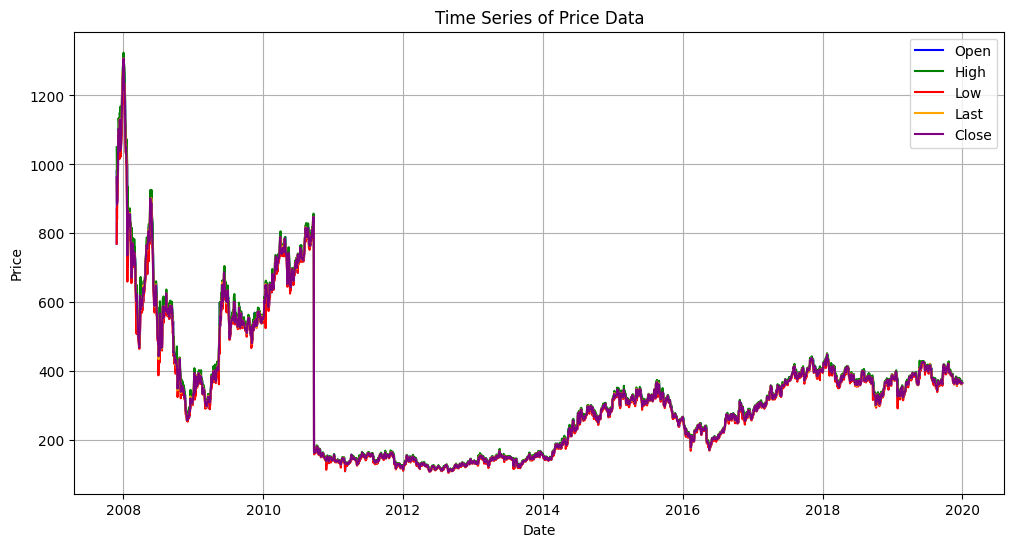

In [13]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(12, 6))

# Plot each price-related column
plt.plot(data['Date'], data['Open'], color='blue', label='Open')
plt.plot(data['Date'], data['High'], color='green', label='High')
plt.plot(data['Date'], data['Low'], color='red', label='Low')
plt.plot(data['Date'], data['Last'], color='orange', label='Last')
plt.plot(data['Date'], data['Close'], color='purple', label='Close')

# Add a legend
plt.legend()

# Add titles and labels
plt.title('Time Series of Price Data')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)

# Show the plot
plt.show()


- All price-related columns have identical values
- There is no variability in the prices (Open, High, Low, Last, Close) across different time periods
- This could indicate potential data quality issues or a lack of price movement during the observed time frame

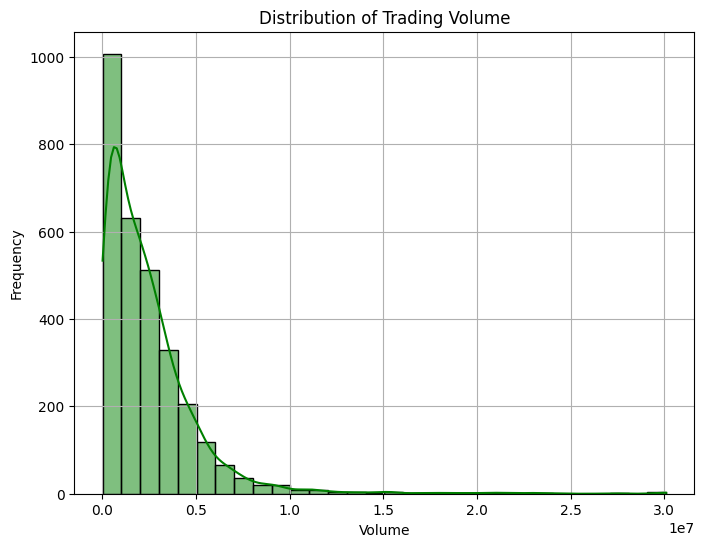

In [27]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Volume'], bins=30, kde=True, color='green')
plt.title('Distribution of Trading Volume')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Trading volume simply refers to the total number of shares (or contracts) of a stock or other financial asset that have been bought and sold during a specific time period, like a day or a week. It's like counting how many times a stock has changed hands between buyers and sellers.

skewness to the right in trading volume means that most of the trading activity involves lower volumes of shares being traded, while there are occasional instances of higher trading volumes. It suggests that smaller transactions are more common

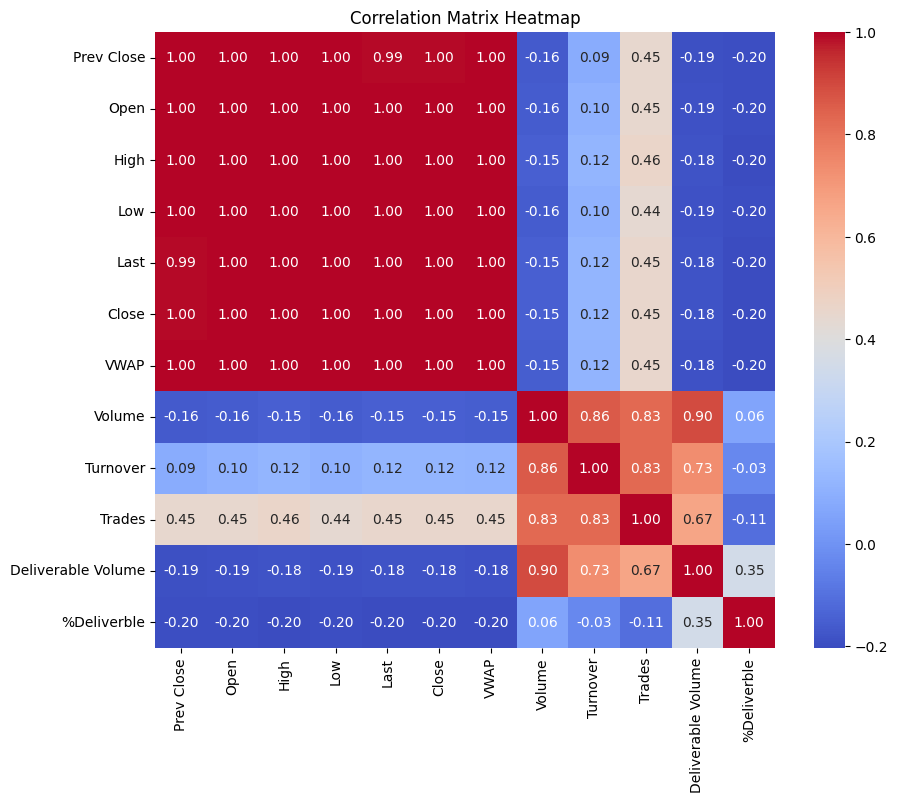

In [14]:
numeric_columns = data.select_dtypes(include=['number'])
correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(10, 8))
plt.title('Correlation Matrix Heatmap')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


- There are strong positive correlations (> 0.95) between 'Prev Close', 'Open', 'High', 'Low', 'Last', and 'Close',
- indicating that these variables are highly correlated, which is expected as they are related to stock price movements.
- The correlation between 'Volume' and 'Deliverable Volume' is relatively high (0.90), indicating a strong positive relationship,
- suggesting that higher trading volumes are associated with higher deliverable volumes of shares.
- The correlation between 'Volume' and '%Deliverble' is weak (0.06), suggesting little linear relationship between them.

# Data Preprocessing

In [36]:
# Drop duplicates
data = data.drop_duplicates()
print("now number of duplicates is:", data.duplicated().sum())

now number of duplicates is: 0


In [37]:
#number of records are 2990, and I have 867 null value in 'traders' so I will drop traders column
data.drop(columns=['Trades'], inplace=True)

In [38]:
print('number of null values: ',data.isnull().sum().sum())

number of null values:  0


In [39]:
# Feature Selection
# Drop non-numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Drop features with low variance
selector = VarianceThreshold(threshold=0.01)
selected_indices = selector.fit(numeric_data).get_support(indices=True)
df_selected = numeric_data.drop(columns=numeric_data.columns[selected_indices])

In [40]:
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,1453278,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,1069678,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,1260913,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,816123,0.2741


In [41]:
# Drop some of the columns ('Open', 'High', 'Low', 'close') because they have the same values
columns_to_drop = ['Open', 'High', 'Low']
data.drop(columns=columns_to_drop, inplace=True)

In [42]:
data.head()

,Date,Symbol,Series,Prev Close,Last,Close,VWAP,Volume,Turnover,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,959.0,962.90,984.72,27294366,2.687719e+15,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,885.0,893.90,941.38,4581338,4.312765e+14,1453278,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,887.0,884.20,888.09,5124121,4.550658e+14,1069678,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,929.0,921.55,929.17,4609762,4.283257e+14,1260913,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,980.0,969.30,965.65,2977470,2.875200e+14,816123,0.2741


### Splitting the time series data to (training, testing, and validation)

In [43]:
train_size = 0.7
validation_size = 0.15


n = len(data)
train_index = int(train_size * n)
validation_index = int((train_size + validation_size) * n)


train_data = data.iloc[:train_index]
validation_data = data.iloc[train_index:validation_index]
test_data = data.iloc[validation_index:]


#Scaling the data after splitting to prevent data leakage
scaler = MinMaxScaler()
# Fit the scaler on training data and transform training, validation, and testing data
train_data[['Close', 'Prev Close', 'Last', 'VWAP', 'Turnover', 'Volume']] = scaler.fit_transform(train_data[['Close', 'Prev Close', 'Last', 'VWAP', 'Turnover', 'Volume']])
validation_data[['Close', 'Prev Close', 'Last', 'VWAP', 'Turnover', 'Volume']] = scaler.transform(validation_data[['Close', 'Prev Close', 'Last', 'VWAP', 'Turnover', 'Volume']])
test_data[['Close', 'Prev Close', 'Last', 'VWAP', 'Turnover', 'Volume']] = scaler.transform(test_data[['Close', 'Prev Close', 'Last', 'VWAP', 'Turnover', 'Volume']])


<ipython-input-43-f0cdd5d9eb8e>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[['Close', 'Prev Close', 'Last', 'VWAP', 'Turnover', 'Volume']] = scaler.fit_transform(train_data[['Close', 'Prev Close', 'Last', 'VWAP', 'Turnover', 'Volume']])
<ipython-input-43-f0cdd5d9eb8e>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation_data[['Close', 'Prev Close', 'Last', 'VWAP', 'Turnover', 'Volume']] = scaler.transform(validation_data[['Close', 'Prev Close', 'Last', 'VWAP', 'Turnover', 'Volume']]

In [44]:
# Feature engineering on the splitted data separately to prevent data leakage
for df in [train_data, validation_data, test_data]:
    # Rolling statistics
    df['Rolling_Close_Mean'] = df['Close'].rolling(window=7).mean()
    df['Rolling_Volume_Std'] = df['Volume'].rolling(window=7).std()

    # Difference features
    df['Close_Diff'] = df['Close'].diff()
    df['Volume_Pct_Change'] = df['Volume'].pct_change()


    # Aggregate features
    df['Rolling_Close_Mean_Month'] = df['Close'].rolling(window=30).mean()
    df['Rolling_Volume_Mean_Month'] = df['Volume'].rolling(window=30).mean()

    # Interaction features
    df['Close_Volume_Product'] = df['Close'] * df['Volume']


# Print the updated DataFrames
print("Train Data:")
print(train_data.head())
print("\nValidation Data:")
print(validation_data.head())
print("\nTest Data:")
print(test_data.head())

Train Data:
         Date      Symbol Series  Prev Close      Last     Close      VWAP  \
0  2007-11-27  MUNDRAPORT     EQ    0.276794  0.709167  0.712743  0.734103   
1  2007-11-28  MUNDRAPORT     EQ    0.712743  0.647500  0.655217  0.697799   
2  2007-11-29  MUNDRAPORT     EQ    0.655217  0.649167  0.647130  0.653161   
3  2007-11-30  MUNDRAPORT     EQ    0.647130  0.684167  0.678269  0.687572   
4  2007-12-03  MUNDRAPORT     EQ    0.678269  0.726667  0.718079  0.718129   

     Volume  Turnover  Deliverable Volume  %Deliverble  Rolling_Close_Mean  \
0  0.908001  1.000000             9859619       0.3612                 NaN   
1  0.152065  0.160386             1453278       0.3172                 NaN   
2  0.170130  0.169238             1069678       0.2088                 NaN   
3  0.153011  0.159288             1260913       0.2735                 NaN   
4  0.098685  0.106895              816123       0.2741                 NaN   

   Rolling_Volume_Std  Close_Diff  Volume_Pct_Chan

<ipython-input-44-909a97487f0a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rolling_Close_Mean'] = df['Close'].rolling(window=7).mean()
<ipython-input-44-909a97487f0a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rolling_Volume_Std'] = df['Volume'].rolling(window=7).std()
<ipython-input-44-909a97487f0a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 